In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/home/jupyter/charliemacuject/research_papers/data/master_allstats.csv', low_memory=False)
df.rename(columns={'InjectionType': 'Drug'}, inplace=True)

In [3]:
df.columns

Index(['Unnamed: 0', 'gender', 'age', 'CreatedDate', 'ExamGraph', 'Drug',
       'NextTime', 'DaysFirst', 'actual_time', 'adherence_factor',
       'running_ad', 'st_dev', 'prev_vision', 'mean_vision', 'std_vision',
       'ID'],
      dtype='object')

In [17]:
df.head()

,Unnamed: 0,gender,age,CreatedDate,ExamGraph,Drug,NextTime,DaysFirst,actual_time,adherence_factor,running_ad,st_dev,prev_vision,mean_vision,std_vision,ID
0,118,Male,91,2017-05-09,0.333333,Lucentis,8.0,104,6.0,1.00,1.25,0.0000,0.333333,0.30,0.0981,0
1,119,Male,91,2017-08-08,0.333333,Lucentis,12.0,195,13.0,1.62,1.12,0.1250,0.333333,0.31,0.0862,0
2,120,Male,91,2017-10-31,0.333333,Lucentis,12.0,279,12.0,1.00,1.29,0.2547,0.333333,0.31,0.0777,0
3,121,Male,91,2018-01-23,0.333333,Lucentis,12.0,363,12.0,1.00,1.22,0.2538,0.333333,0.32,0.0714,0
4,122,Male,91,2018-04-24,0.333333,Lucentis,12.0,454,13.0,1.08,1.17,0.2431,0.333333,0.32,0.0663,0


In [14]:
def drug_df_separator(df):
        """
        Produces a list of dataframes based single vs mult drugs.
        Input: self.
        Output: [Pandas dataframe].
        """
        df = df.dropna(subset=['Drug'])
        lucentis, eylea, avastin, mult = [], [], [], []
        drug_list = ['Lucentis', 'Eylea', 'Avastin']
        id_list = df['ID'].unique()
        for eye in id_list:
            pdf = df[df['ID'] == eye]
            drugs = pdf['Drug'].unique()
            if len(drugs) == 1:
                if drugs[0] == 'Lucentis':
                    lucentis.append(pdf)
                elif drugs[0] == 'Eylea':
                    eylea.append(pdf)
                else:
                    avastin.append(pdf)
            else:
                mult.append(pdf)
        return pd.concat(lucentis), pd.concat(eylea), pd.concat(mult)

In [15]:
luc_df, eyl_df, mult_df = drug_df_separator(df)

In [16]:
len(luc_df), len(eyl_df), len(mult_df)

(1049, 1338, 4031)

In [35]:
def loading_dose(df):
    id_list = df.ID.unique()
    luc_fst, luc_snd, luc_thrd = [], [], []
    eyl_fst, eyl_snd, eyl_thrd = [], [], []
    for eye in id_list:
        pdf = df[df.ID == eye]
        pdf.CreatedDate = pd.to_datetime(pdf.CreatedDate)
        pdf.sort_values(by=['CreatedDate'], inplace=True)
        if len(pdf) > 3 and pdf.Drug.iloc[0] == 'Lucentis':
            luc_fst.append((pdf.CreatedDate.iloc[1] - pdf.CreatedDate.iloc[0]).days)
            luc_snd.append((pdf.CreatedDate.iloc[2] - pdf.CreatedDate.iloc[1]).days)
            luc_thrd.append((pdf.CreatedDate.iloc[3] - pdf.CreatedDate.iloc[2]).days)
        elif len(pdf) > 3 and pdf.Drug.iloc[0] == 'Eylea':
            eyl_fst.append((pdf.CreatedDate.iloc[1] - pdf.CreatedDate.iloc[0]).days)
            eyl_snd.append((pdf.CreatedDate.iloc[2] - pdf.CreatedDate.iloc[1]).days)
            eyl_thrd.append((pdf.CreatedDate.iloc[3] - pdf.CreatedDate.iloc[2]).days)
        else:
            pass
    return luc_fst, luc_snd, luc_thrd, eyl_fst, eyl_snd, eyl_thrd

luc_fst, luc_snd, luc_thrd, eyl_fst, eyl_snd, eyl_thrd = loading_dose(df)
    
print("Lucentis means for first three visits: {}, {}, {}.".format(np.mean(luc_fst)/7, np.mean(luc_snd)/7, np.mean(luc_thrd)/7))
print("Eylea means for first three visits: {}, {}, {}.".format(np.mean(eyl_fst)/7, np.mean(eyl_snd)/7, np.mean(eyl_thrd)/7))

Lucentis means for first three visits: 6.877385772122614, 7.63794100636206, 8.223828802776172.
Eylea means for first three visits: 6.591296121097446, 7.525070955534532, 7.521286660359508.


In [40]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats

stats.mannwhitneyu(luc_thrd, eyl_thrd)

MannwhitneyuResult(statistic=16751.0, pvalue=0.04337313315969649)

In [48]:
cm = sms.CompareMeans(sms.DescrStatsW(luc_thrd), sms.DescrStatsW(eyl_thrd))
print(cm.tconfint_diff(usevar='unequal'))

(-5.768792778187898, 15.604382772021179)


In [61]:
-15.6/7

-2.2285714285714286

In [5]:
np.round(df.actual_time.unique())

array([ 6., 13., 12., 16.,  4.,  8.,  5.,  4.,  5.,  7.,  4.,  3.,  4.,
        5.,  8.,  8.,  3.,  4.,  4.,  3.,  5.,  9.,  9.,  7.,  7.,  9.,
        8.,  9.,  6.,  3.,  5.,  9.,  5., 10., 11.,  4.,  8.,  7., 11.,
        8.,  1., 10.,  7.,  7.,  6., 10.,  3., 19.,  3.,  5., 23.,  9.,
        6., 10.,  2.,  7.,  6.,  2., 14., 13., 10.,  6.,  8., 13.,  3.,
       12., 12., 12., 12., 11., 11., 11.,  9., 10., 12.,  1., 14., 19.,
        6.,  2., 13., 21., 49.,  2., 12., 14., 11., 10., 14.,  1., 20.,
        1., 11., 22.,  2., 13., 15.,  1., 13., 35.,  2.,  0., 39.,  2.,
       16., 13., 18., 15., 17., 15., 33.])

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/charlieoneill11/macuject_automated/main/data/master.csv?token=APDSLSQLIDQSLNNWAFWR7JDBA6VL4')
df.head()

,Unnamed: 0,id,eye_id,next_visit_date,created_at,next_interval_in_weeks,drug_id,next_drug_id,admission_date,doctor_visit_type,Recommended drug,Recommended next drug,Recommended next interval,Drug,Next Drug,Next Interval,visual_acuity
0,0,38767.0,3149.0,9/12/19,2020-07-13 14:00:16 +1000,4.0,1.0,1.0,11/11/19,NaN,NaN,NaN,NaN,Lucentis,Lucentis,4,55.0
1,1,38769.0,3149.0,17/1/20,2020-07-13 14:00:16 +1000,4.0,1.0,1.0,20/12/19,NaN,NaN,NaN,NaN,Lucentis,Lucentis,4,55.0
2,2,38771.0,3149.0,14/2/20,2020-07-13 14:00:16 +1000,4.0,1.0,1.0,17/1/20,NaN,NaN,NaN,NaN,Lucentis,Lucentis,4,55.0
3,3,38773.0,3149.0,13/3/20,2020-07-13 14:00:16 +1000,4.0,1.0,1.0,14/2/20,NaN,NaN,NaN,NaN,Lucentis,Lucentis,4,55.0
4,4,38775.0,3149.0,13/4/20,2020-07-13 14:00:16 +1000,4.0,1.0,1.0,16/3/20,NaN,NaN,NaN,NaN,Lucentis,Lucentis,4,55.0


In [29]:
df['Next Interval'].unique()

array(['4', nan, '0', 'nil', '6', '7', '5', '8', '13', '12', '9', '11',
       '10', '17', '14', '2', '3', '1', '15', '16', '0.0', '4.0', '6.0',
       '16.0', '12.0', '8.0', '5.0', '3.0', '18.0', '20.0', '10.0', '9.0',
       '7.0', '11.0', '2.0', '13.0', '15.0', '14.0', '17.0', '19.0', 4.0,
       0.0, 8.0, 6.0, 5.0, 10.0, 7.0, 3.0, 18.0, 16.0, 20.0, 12.0, 11.0,
       9.0, 19.0, 13.0, 14.0, 17.0, 15.0, 2.0], dtype=object)

In [49]:
def interval_combs(df):
    eye_list = df['eye_id'].unique()
    interval_list_luc, interval_list_eyl = [], []
    for eye in eye_list:
        df_new = df[df['eye_id'] == eye]
        df_new = df_new[df_new['Next Interval'] != '0']
        df_new = df_new[df_new['Next Interval'] != '0.0']
        df_new = df_new[df_new['Next Interval'] != 'None']
        df_new = df_new[df_new['Next Interval'] != 'nil']
        df_new['Next Interval'] = pd.to_numeric(df_new['Next Interval'])
        df_new = df_new.dropna(subset=['Next Interval'])
        if len(df_new) > 4:
            interval_luc, interval_eyl = [], []
            for i in range(4):
                if df_new['Drug'].iloc[0] == 'Lucentis':
                    if int(df_new['Next Interval'].iloc[i]) == 0 or int(df_new['Next Interval'].iloc[i]) == 12:
                        interval_luc.append(4)
                    else:
                        interval_luc.append(int(df_new['Next Interval'].iloc[i]))
                elif df_new['Drug'].iloc[0] == 'Eylea':
                    if int(df_new['Next Interval'].iloc[i]) == 0 or int(df_new['Next Interval'].iloc[i]) == 12:
                        interval_eyl.append(4)
                    else:
                        interval_eyl.append(int(df_new['Next Interval'].iloc[i]))
                else:
                    pass
            interval_list_luc.append(interval_luc)
            interval_list_eyl.append(interval_eyl)
    interval_set_luc = [list(x) for x in set(tuple(x) for x in interval_list_luc)]
    interval_set_eyl = [list(x) for x in set(tuple(x) for x in interval_list_eyl)]
    count_luc, comb_luc = [], []
    count_eyl, comb_eyl = [], []
    for i in interval_set_luc:
        if interval_list_luc.count(i) > 5:
            count_luc.append(interval_list_luc.count(i))
            comb_luc.append(i)
    for i in interval_set_eyl:
        if interval_list_eyl.count(i) > 5:
            count_eyl.append(interval_list_eyl.count(i))
            comb_eyl.append(i)
    return count_luc, comb_luc, count_eyl, comb_eyl

In [56]:
interval_combs(df)

([17, 14, 12, 9, 110, 395, 7, 9],
 [[4, 4, 4, 6],
  [8, 8, 8, 8],
  [4, 6, 4, 4],
  [4, 4, 6, 4],
  [4, 4, 4, 4],
  [],
  [6, 4, 4, 4],
  [4, 4, 6, 8]],
 [19, 10, 91, 459, 8],
 [[4, 4, 4, 6], [4, 4, 6, 4], [4, 4, 4, 4], [], [6, 4, 4, 4]])

In [61]:
def interval_frequency(df):
    _, _, count, comb = interval_combs(df)

    # delete nonsensical rows
    comb.remove([])
    del count[3]

    # get the dataframe of comb and count
    comb_df = pd.DataFrame(
        {'count': count,
         'comb': comb
        })
    comb_df.sort_values('count', inplace=True, ascending=False)
    comb_df.reset_index(inplace=True, drop=True)

    # plot the interval frequencies
    plt.rcdefaults()
    matplotlib.rcParams['font.size'] = 18
    fig, ax = plt.subplots(figsize=(12, 8))
    colrs = ['#03254c', '#1167b1', '#187bcd', '#2a9df4', '#d0efff']

    # data
    combs = comb_df['comb']
    y_pos = np.arange(len(combs))
    interval_length = comb_df['count']

    ax.barh(y_pos, interval_length, align='center', color=colrs)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(combs, fontsize=16)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Interval Pattern: Number of Patients', fontsize=18)

    plt.show()

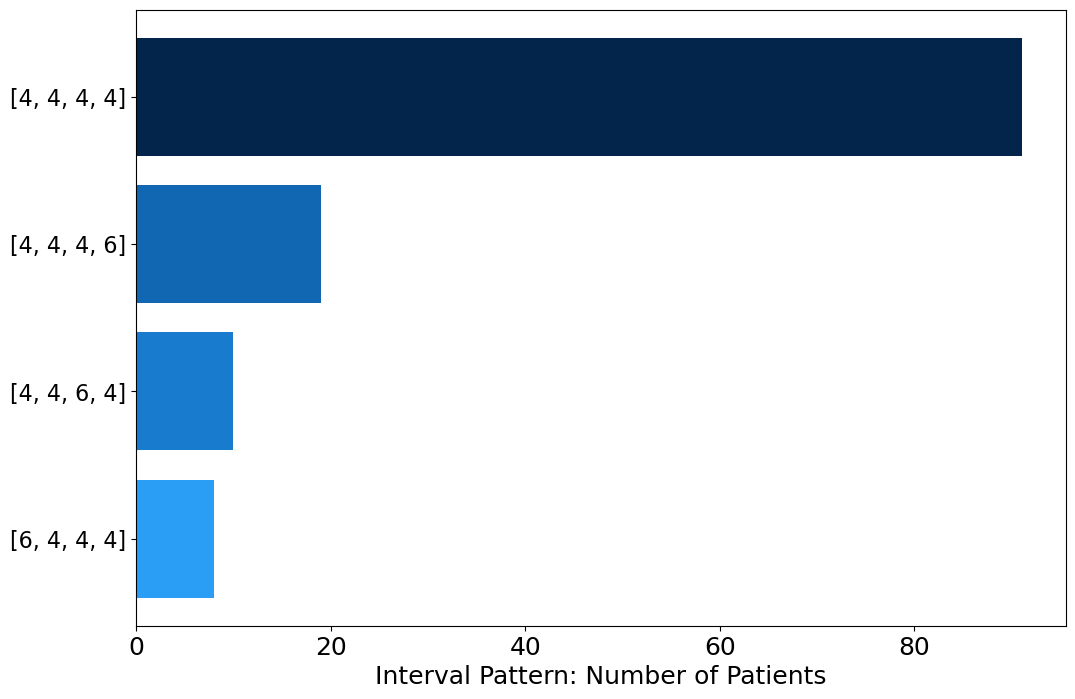

In [62]:
interval_frequency(df)

## Drug total utilisation

In [54]:
def drug_totals(df, num_visits, drug_name):
    eye_list = df['ID'].unique()
    drugs_list, names_list = [], ['Lucentis', 'Avastin', 'Eylea']
    for eye in eye_list:
        count, df_new = 0, df[df['ID'] == eye]
        if len(df_new) > num_visits:
            for i in range(len(df_new)):
                while count < num_visits:
                    date = df_new['CreatedDate'].iloc[i]
                    drug = df_new['Drug'].iloc[i]
                    if drug in names_list:
                        drugs_list.append(drug)
                    count += 1
                    i += 1
    length = len(drugs_list)
    count_drug = drugs_list.count(drug_name)
    return count_drug

# this function recurses over all patients in dataframe
def all_drugs(visit_num, drug_name, df):
    counts = []
    for i in range(1, visit_num+1):
        average_drug = drug_totals(df, i, drug_name)
        counts.append(average_drug)
    return counts

# get the numbers for each drug
w, y, z = all_drugs(50, 'Lucentis', df), all_drugs(50, 'Eylea', df), all_drugs(50, 'Avastin', df)

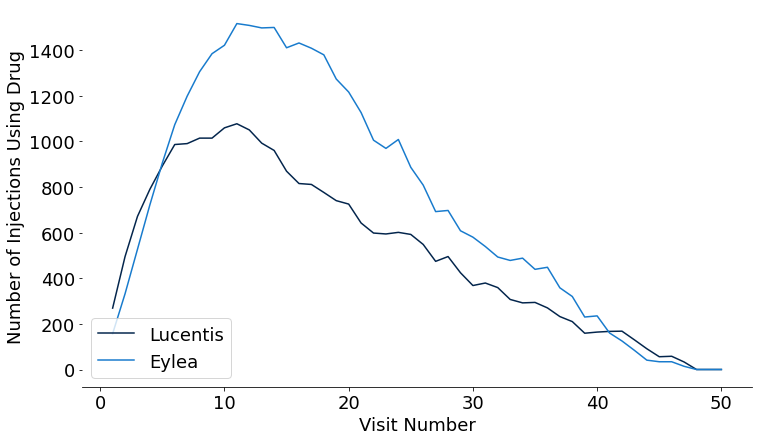

In [57]:
matplotlib.rcParams['font.size'] = 18
x = list(range(1, 51))
fig = plt.figure(figsize=(12, 7))
ax = plt.axes()
ax.set(xlabel='Visit Number', ylabel='Number of Injections Using Drug')
ax.plot(x, w, label='Lucentis', color='#03254c')
ax.plot(x, y, label='Eylea', color='#187bcd')
ax.legend(loc='lower left')
right_side = ax.spines["right"]
left_side = ax.spines['left']
top_side = ax.spines['top']
right_side.set_visible(False)
left_side.set_visible(False)
top_side.set_visible(False)